<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 150A - Intermediate Fluid Mechanics**

<hr />

# Quasi-1D Steady Compressible Flow
This notebook demonstrates the use of some tools for computing states and processes in quasi-1d steady compressible flow.

In [1]:
include("src/gasdynamics.jl")

In [2]:
using Plots

### Setting basic properties and states

We can set thermodynamic properties and states in a straightforward manner.

#### Units
When we set a thermodynamic quantity, we also need to set its units. For every quantity, we have a few units to choose from. For example:

In [3]:
PressureUnits

Union{KPa, Pa, Pascals, atm, psi}

Among these, one is designated the default unit. All quantities are converted to this unit for calculation purposes. For example, for pressure:

In [4]:
default_unit(PressureUnits)

Pascals

If we do not specify the unit, it is automatically set to the default:

In [5]:
Pressure(10000)

Pressure = 10000.0 Pascals

and if we set the pressure in another unit:

In [6]:
p = Pressure(1,units=atm)

Pressure = 101325.0 Pascals

However, we can always convert the quantity to some desired units with the `value` function:

In [7]:
value(p,atm)

1.0

In [8]:
value(p,psi)

14.695943005992957

In [9]:
value(p,KPa)

101.325

#### Other thermodynamic quantities
We can set most any other thermodynamic quantity in similar fashion:

In [10]:
T = Temperature(20,units=Celsius)

Temperature = 293.15 Kelvin

In [11]:
T0 = StagnationTemperature(20)

StagnationTemperature = 20.0 Kelvin

In [12]:
MachNumber(2.0)

MachNumber = 2.0 

In [13]:
Enthalpy(50)

Enthalpy = 50.0 JPerKG

In [14]:
Entropy(10)

Entropy = 10.0 JPerKGK

and others...

#### Gas properties
We can set the properties of the gas. (It is assumed that the gas is perfect.)

In [15]:
SpecificHeatRatio(1.3)

SpecificHeatRatio = 1.3 

In [16]:
GasConstant(320)

GasConstant = 320.0 JPerKGK

and define a gas with these values:

In [17]:
gas = PerfectGas(γ=SpecificHeatRatio(1.3),R=GasConstant(320))

Perfect gas with
   Specific heat ratio = 1.3
   Gas constant = 320.0
   cp = 1386.67
   cv = 1066.67


We have **pre-defined gases** (at standard conditions), as well:

In [18]:
Air

Perfect gas with
   Specific heat ratio = 1.4
   Gas constant = 287.0
   cp = 1004.5
   cv = 717.5


In [19]:
He

Perfect gas with
   Specific heat ratio = 1.66667
   Gas constant = 2077.0
   cp = 5192.5
   cv = 3115.5


#### Equations of state
We can apply the equation of state for a perfect gas to determine other quantities. For example, suppose we have carbon dioxide at 1.2 kg/m^3 and 80 KPa. What is the temperature?

In [20]:
T = Temperature(Density(1.2),Pressure(80,units=KPa),gas=CO2)

Temperature = 352.734 Kelvin

In [21]:
Enthalpy(T)

Enthalpy = 354321.0 JPerKG

What is the speed of sound of air at 20 degrees Celsius?

In [22]:
SoundSpeed(Temperature(20,units=C),gas=Air)

SoundSpeed = 343.202 MPerSec

**Note: the default gas is air. So if you do not put the `gas=` argument in, it will assume air at standard conditions.**

### Using isentropic relations
Let us apply some basic isentropic relations. For example, let's find the temperature ratio in Helium that results from a pressure ratio of 1.2. Note that we specify the argument `Isentropic`:

In [23]:
TemperatureRatio(PressureRatio(1.2),Isentropic,gas=He)

TemperatureRatio = 1.07565 

What are the subsonic and supersonic Mach numbers associated with an area ratio $A/A_*$ of 2?

In [24]:
M1, M2 = MachNumber(AreaRatio(2));

In [25]:
M1

MachNumber = 0.305904 

In [26]:
M2

MachNumber = 2.1972 

From another perspective: What is the local sonic reference area $A_*$ when the Mach number is 7.1 and the local area is 50 sq cm?

In [7]:
AStar(Area(50,units=SqCM),MachNumber(7.1))

Area = 4.507e-5 SqM

If the temperature ratio $T/T_0$ is 0.2381, what is the Mach number?

In [27]:
MachNumber(TemperatureRatio(0.2381))

MachNumber = 3.99995 

If the Mach number is 4.4 and stagnation pressure is 800 KPa, what is the pressure?

In [28]:
Pressure(StagnationPressure(800,units=KPa),MachNumber(4.4))

Pressure = 3134.11 Pascals

If the Mach number and area at location 1 are 0.4 and 50 sq cm, respectively, then what are the possible Mach numbers (in choked isentropic conditions) where the area is 60 sq cm?

In [48]:
M2sub, M2sup = MachNumber(MachNumber(0.4),Area(50,units=SqCM),Area(60,units=SqCM),gas=Air);

In [49]:
M2sub

MachNumber = 0.322613 

In [50]:
M2sup

MachNumber = 2.1438 

Let's plot the area ratio $A/A_*$ for all possible Mach numbers:

In [52]:
Mrange = range(0,6,length=601)
Aratio = []
for M in Mrange
    push!(Aratio,value(AOverAStar(MachNumber(M))))
end

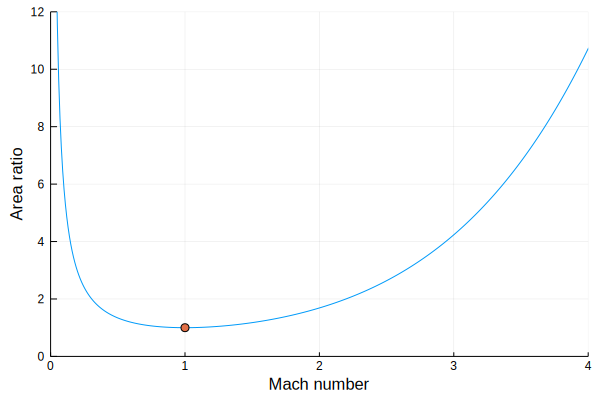

In [54]:
plot(Mrange,Aratio,xlim=(0,4),ylim=(0,12),xlabel="Mach number",ylabel="Area ratio",legend=false)
scatter!([1],[1])

This shows the possible Mach numbers that can be reached isentropically in a given nozzle

### Using normal shock relations
We can make calculations across normal shocks. These relations require the argument `NormalShock`.

For example, let's look at the ratio of stagnation pressures across a normal shock with the Mach number entering the shock equal to 2:

In [55]:
StagnationPressureRatio(MachNumber(2),NormalShock)

StagnationPressureRatio = 0.720874 

and the density increases by the factor:

In [64]:
DensityRatio(MachNumber(2),NormalShock)

DensityRatio = 2.66667 

What is the entropy change across this shock?

In [59]:
Entropy(Entropy(0),MachNumber(2),NormalShock)

Entropy = 93.9325 JPerKGK

Let's plot the entropy increase as a function of Mach number:

In [63]:
M1 = range(1,3,length=101)
s2 = []
pratio = []
for M in M1
    push!(s2,value(Entropy(Entropy(0),MachNumber(M),NormalShock)))
    push!(pratio,value(PressureRatio(MachNumber(M),NormalShock)))
end

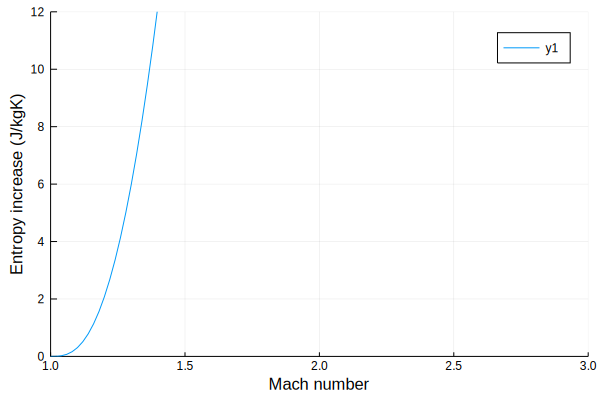

In [66]:
plot(M1,s2,xlim=(1,3),ylim=(0,12),xlabel="Mach number",ylabel="Entropy increase (J/kgK)")

### Example 8.6 in Wilcox
For air entering a shock at Mach number 3, 1 atm, and 50 degrees F, what is the Mach number, pressure, and temperature on the other side of the shock?

In [67]:
p1 = Pressure(1,units=atm)
M1 = MachNumber(3)
T1 = Temperature(50,units=F)

Temperature = 283.15 Kelvin

Mach number exiting the shock is

In [68]:
MachNumber(M1,NormalShock)

MachNumber = 0.475191 

Pressure exiting the shock (in atm) is

In [69]:
p2 = Pressure(p1*PressureRatio(M1,NormalShock))
value(p2,atm)

10.333333333333334

and the temperature exiting the shock (in F) is

In [70]:
T2 = Temperature(T1*TemperatureRatio(M1,NormalShock))
value(T2,F)

905.7422222222218

### Example 8.9 in Wilcox
A blow-down supersonic windtunnel is supplied with air from a large reservoir. A Pitot tube is placed at the exit plane of a converging-diverging nozzle. The test section lies at the end of the diverging section. The Mach number in the test section (M2) is 2 and the pressure is below atmospheric, so a shock is formed at the exit. The pressure just after the shock (p3) is 14.7 psi. Find the pressure in the reservoir (p01), the pressure in the throat (pth), the Mach number just after the shock (M3), the pressure at the Pitot tube (p4), and the temperature at the Pitot tube (T4).

In [71]:
M2 = MachNumber(2)
p3 = Pressure(14.7,units=psi)

Pressure = 101353.0 Pascals

First, let's find the pressure just before the shock and the Mach number just after the shock

In [72]:
# p3/p2
pratio = PressureRatio(M2,NormalShock)

# p03/p02
p0ratio = StagnationPressureRatio(M2,NormalShock)

# M3
M3 = MachNumber(M2,NormalShock)

MachNumber = 0.57735 

We can now calculate the pressure just before the shock

In [73]:
p2 = Pressure(p3/pratio)

Pressure = 22522.9 Pascals

Now, let's find the conditions in the throat and reservoir, based on what we have been given here. We can immediately find the stagnation pressure upstream of the shock. This is the same as the reservoir pressure. 

In [74]:
p02 = StagnationPressure(p2,M2)
p01 = p02

StagnationPressure = 176229.0 Pascals

We know that the throat is choked. It must be, because the flow is subsonic before and supersonic after the throat. Therefore, Mth is 1, and we can get the local pressure (pth) from knowing the stagnation pressure and Mach number there:

In [75]:
Mth = MachNumber(1)
p0th = p02
pth = Pressure(p0th,Mth)

Pressure = 93098.6 Pascals

Now we can calculate the conditions at the Pitot tube at the exit. At the nose of the Pitot tube, the flow stagnates. Thus, the pressure and temperature are equal to the stagnation values. The stagnation pressure at the exit is the same as the stagnation pressure at point 3 (just after the shock):

In [76]:
p03 = Pressure(p0ratio*p02)

Pressure = 127039.0 Pascals

In [77]:
value(p03,psi)

18.425439988556167

### Fanno flow

In [8]:
M1 = MachNumber(0.1)
fL1starD = FLStarOverD(M1,FannoFlow)
p1_over_pstar = POverPStar(M1,FannoFlow)
T1_over_Tstar = TOverTStar(M1,FannoFlow)
ρ1_over_ρstar = ρOverρStar(M1,FannoFlow)
u1_over_ustar = 1/ρ1_over_ρstar
p01_over_p0star = P0OverP0Star(M1,FannoFlow)

StagnationPressureRatio = 5.82183 

In [ ]:
M2 = MachNumber(0.5)
fL2starD = FLStarOverD(M2,FannoFlow)

In [7]:
f = FrictionFactor(0.024)
D = Diameter(2,units=CM)
L1star = Length(fL1starD,D,f)
L2star = Length(fL2starD,D,f)
L = Length(L1star-L2star)

Length = 54.8771 Meters

In [8]:
L2star

Length = 0.890884 Meters

Another example

In [59]:
D = Diameter(3,units=CM)
p01 = StagnationPressure(200,units=KPa)
T01 = StagnationTemperature(500)
u1 = Velocity(100)
f = FrictionFactor(0.02)

FrictionFactor = 0.02 

In [60]:
h01 = StagnationEnthalpy(T01)
h1 = Enthalpy(h01,u1)
T1 = Temperature(h1)
c1 = SoundSpeed(T1)
M1 = MachNumber(u1,c1)
L = Length(15)

Length = 15.0 Meters

In [61]:
fL1starD = FLStarOverD(M1,FannoFlow)
L1star = Length(fL1starD,D,f)

Length = 16.6163 Meters

In [62]:
A = Area(D)
ρ01 = StagnationDensity(p01,T01)
ρ1 = Density(ρ01,M1)

Density = 1.3593 KGPerCuM

In [63]:
ṁ = MassFlowRate(ρ1*u1*A)

MassFlowRate = 0.0960832 KGPerSec

In [72]:
Lstar = L = Length(30)
fLstar_over_D = FLOverD(f,Lstar,D)
M1 = MachNumber(fLstar_over_D)

MachNumber = 0.174121 

In [73]:
T1 = Temperature(T01,M1)
ρ1 = Density(ρ01,M1)
c1 = SoundSpeed(T1)
u1 = Velocity(c1,M1)
ṁ = MassFlowRate(ρ1*u1*A)

MassFlowRate = 0.0755048 KGPerSec

In [31]:
Mrange = range(0.1,8,length=801)
fLDarray = []
for M in Mrange
    push!(fLDarray,value(FLStarOverD(MachNumber(M),FannoFlow)))
end

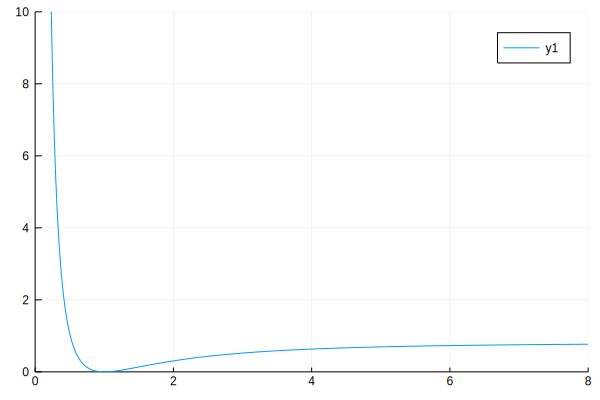

In [33]:
plot(Mrange,fLDarray,xlim=(0,8),ylim=(0,10))

In [40]:
FLStarOverD(MachNumber(1e10),FannoFlow)

FLOverD = 0.821508 

### Rayleigh flow

In [18]:
u1 = Velocity(75)
p1 = Pressure(150,units=KPa)
T1 = Temperature(300)
q = HeatFlux(900,units=KJPerKG)

HeatFlux = 900000.0 JPerKG

In [19]:
h1 = Enthalpy(T1,gas=Air)
h01 = StagnationEnthalpy(h1,u1)
T01 = StagnationTemperature(h01,gas=Air)

StagnationTemperature = 302.8 Kelvin

In [20]:
h02 = StagnationEnthalpy(h01+q)
T02 = StagnationTemperature(h02,gas=Air)

StagnationTemperature = 1198.77 Kelvin

In [21]:
c1 = SoundSpeed(T1,gas=Air)

SoundSpeed = 347.189 MPerSec

In [22]:
M1 = MachNumber(u1/c1)

MachNumber = 0.216021 

In [23]:
T0star = StagnationTemperature(T01/T0OverT0Star(M1,RayleighFlow,gas=Air))

StagnationTemperature = 1520.05 Kelvin

In [24]:
ustar = Velocity(u1/VOverVStar(M1,RayleighFlow,gas=Air))
pstar = Pressure(p1/POverPStar(M1,RayleighFlow,gas=Air))
Tstar = Temperature(T1/TOverTStar(M1,RayleighFlow,gas=Air))

Temperature = 1266.71 Kelvin

In [25]:
T02_over_T0star = TemperatureRatio(T02/T0star)

TemperatureRatio = 0.788637 

In [26]:
M2 = MachNumber(T02_over_T0star,RayleighFlow,gas=Air)

MachNumber = 0.57332 

In [29]:
u2 = Velocity(ustar*VOverVStar(M2,RayleighFlow,gas=Air))
p2 = Pressure(pstar*POverPStar(M2,RayleighFlow,gas=Air))
T2 = Temperature(Tstar*TOverTStar(M2,RayleighFlow,gas=Air))

Temperature = 1124.82 Kelvin

In [30]:
qmax = HeatFlux(T01,T0star,gas=Air)

HeatFlux = 1.22273e6 JPerKG